In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # For Classificatio problem
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree # This is actually used for Prediction

In [31]:
data = pd.read_csv('User_Data.csv')

In [3]:
data.shape

(400, 5)

In [33]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# X & Y Feature

In [5]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

# Testing

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [7]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
X_train= st_x.fit_transform(x_train)    
X_test= st_x.transform(x_test)  

In [8]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 4,random_state = 0) # Here the 4 is Braches
# Step 3: Train the model on the data
clf.fit(X_train, y_train)# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial


DecisionTreeClassifier(max_depth=4, random_state=0)

In [9]:
y_pred=clf.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [11]:
cm

array([[65,  3],
       [ 4, 28]], dtype=int64)

[Text(155.44285714285715, 195.696, 'X[0] <= 0.631\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(63.77142857142857, 152.208, 'X[1] <= 0.606\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(31.885714285714286, 108.72, 'X[0] <= -0.161\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(15.942857142857143, 65.232, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(47.82857142857143, 65.232, 'X[1] <= 0.403\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(31.885714285714286, 21.744, 'gini = 0.153\nsamples = 60\nvalue = [55, 5]'),
 Text(63.77142857142857, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(95.65714285714286, 108.72, 'X[0] <= -1.151\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(79.71428571428572, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.6, 65.232, 'X[1] <= 1.36\ngini = 0.229\nsamples = 38\nvalue = [5, 33]'),
 Text(95.65714285714286, 21.744, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(127.54285714285714, 

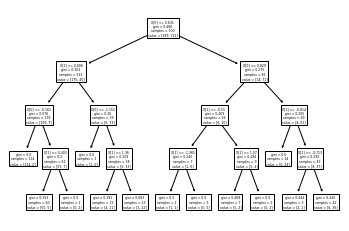

In [12]:
tree.plot_tree(clf)

In [13]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.90      0.88      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [14]:
#n_estimator=50. here '50' number of decision tree
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier= classifier.fit(X_train, y_train)

In [15]:
# To look number of decision tree
classifier.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1826616365),
 DecisionTreeClassifier(max_features='auto', random_state=422663327),
 DecisionTreeClassifier(max_features='auto', random_state=228610949),
 DecisionTreeClassifier(max_features='auto', random_state=556840283),
 DecisionTreeClassifier(max_features='auto', random_state=1332870392),
 DecisionTreeClassifier(max_features='auto', random_state=191105234),
 DecisionTreeClassifier(max_features='auto', random_state=114647414),
 DecisionTreeClassifier(max_features='auto', random_state=1709574403),
 DecisionTreeClassifier(max_features='auto', random_state=1855153268),
 DecisionTreeClassifier(max_features='auto', random_state=2105884074),
 DecisionTreeClassifier(max_features='auto', random_state=1883335374),
 DecisionTreeClassifier(max_features='auto', random_state=289878564),
 DecisionTreeClassifier(max_features='auto', random_state=633469751),
 DecisionTreeClassifier(max_features='auto', random_state=1425281279),
 DecisionTree

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[63  5]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100

Accuracy: 0.91


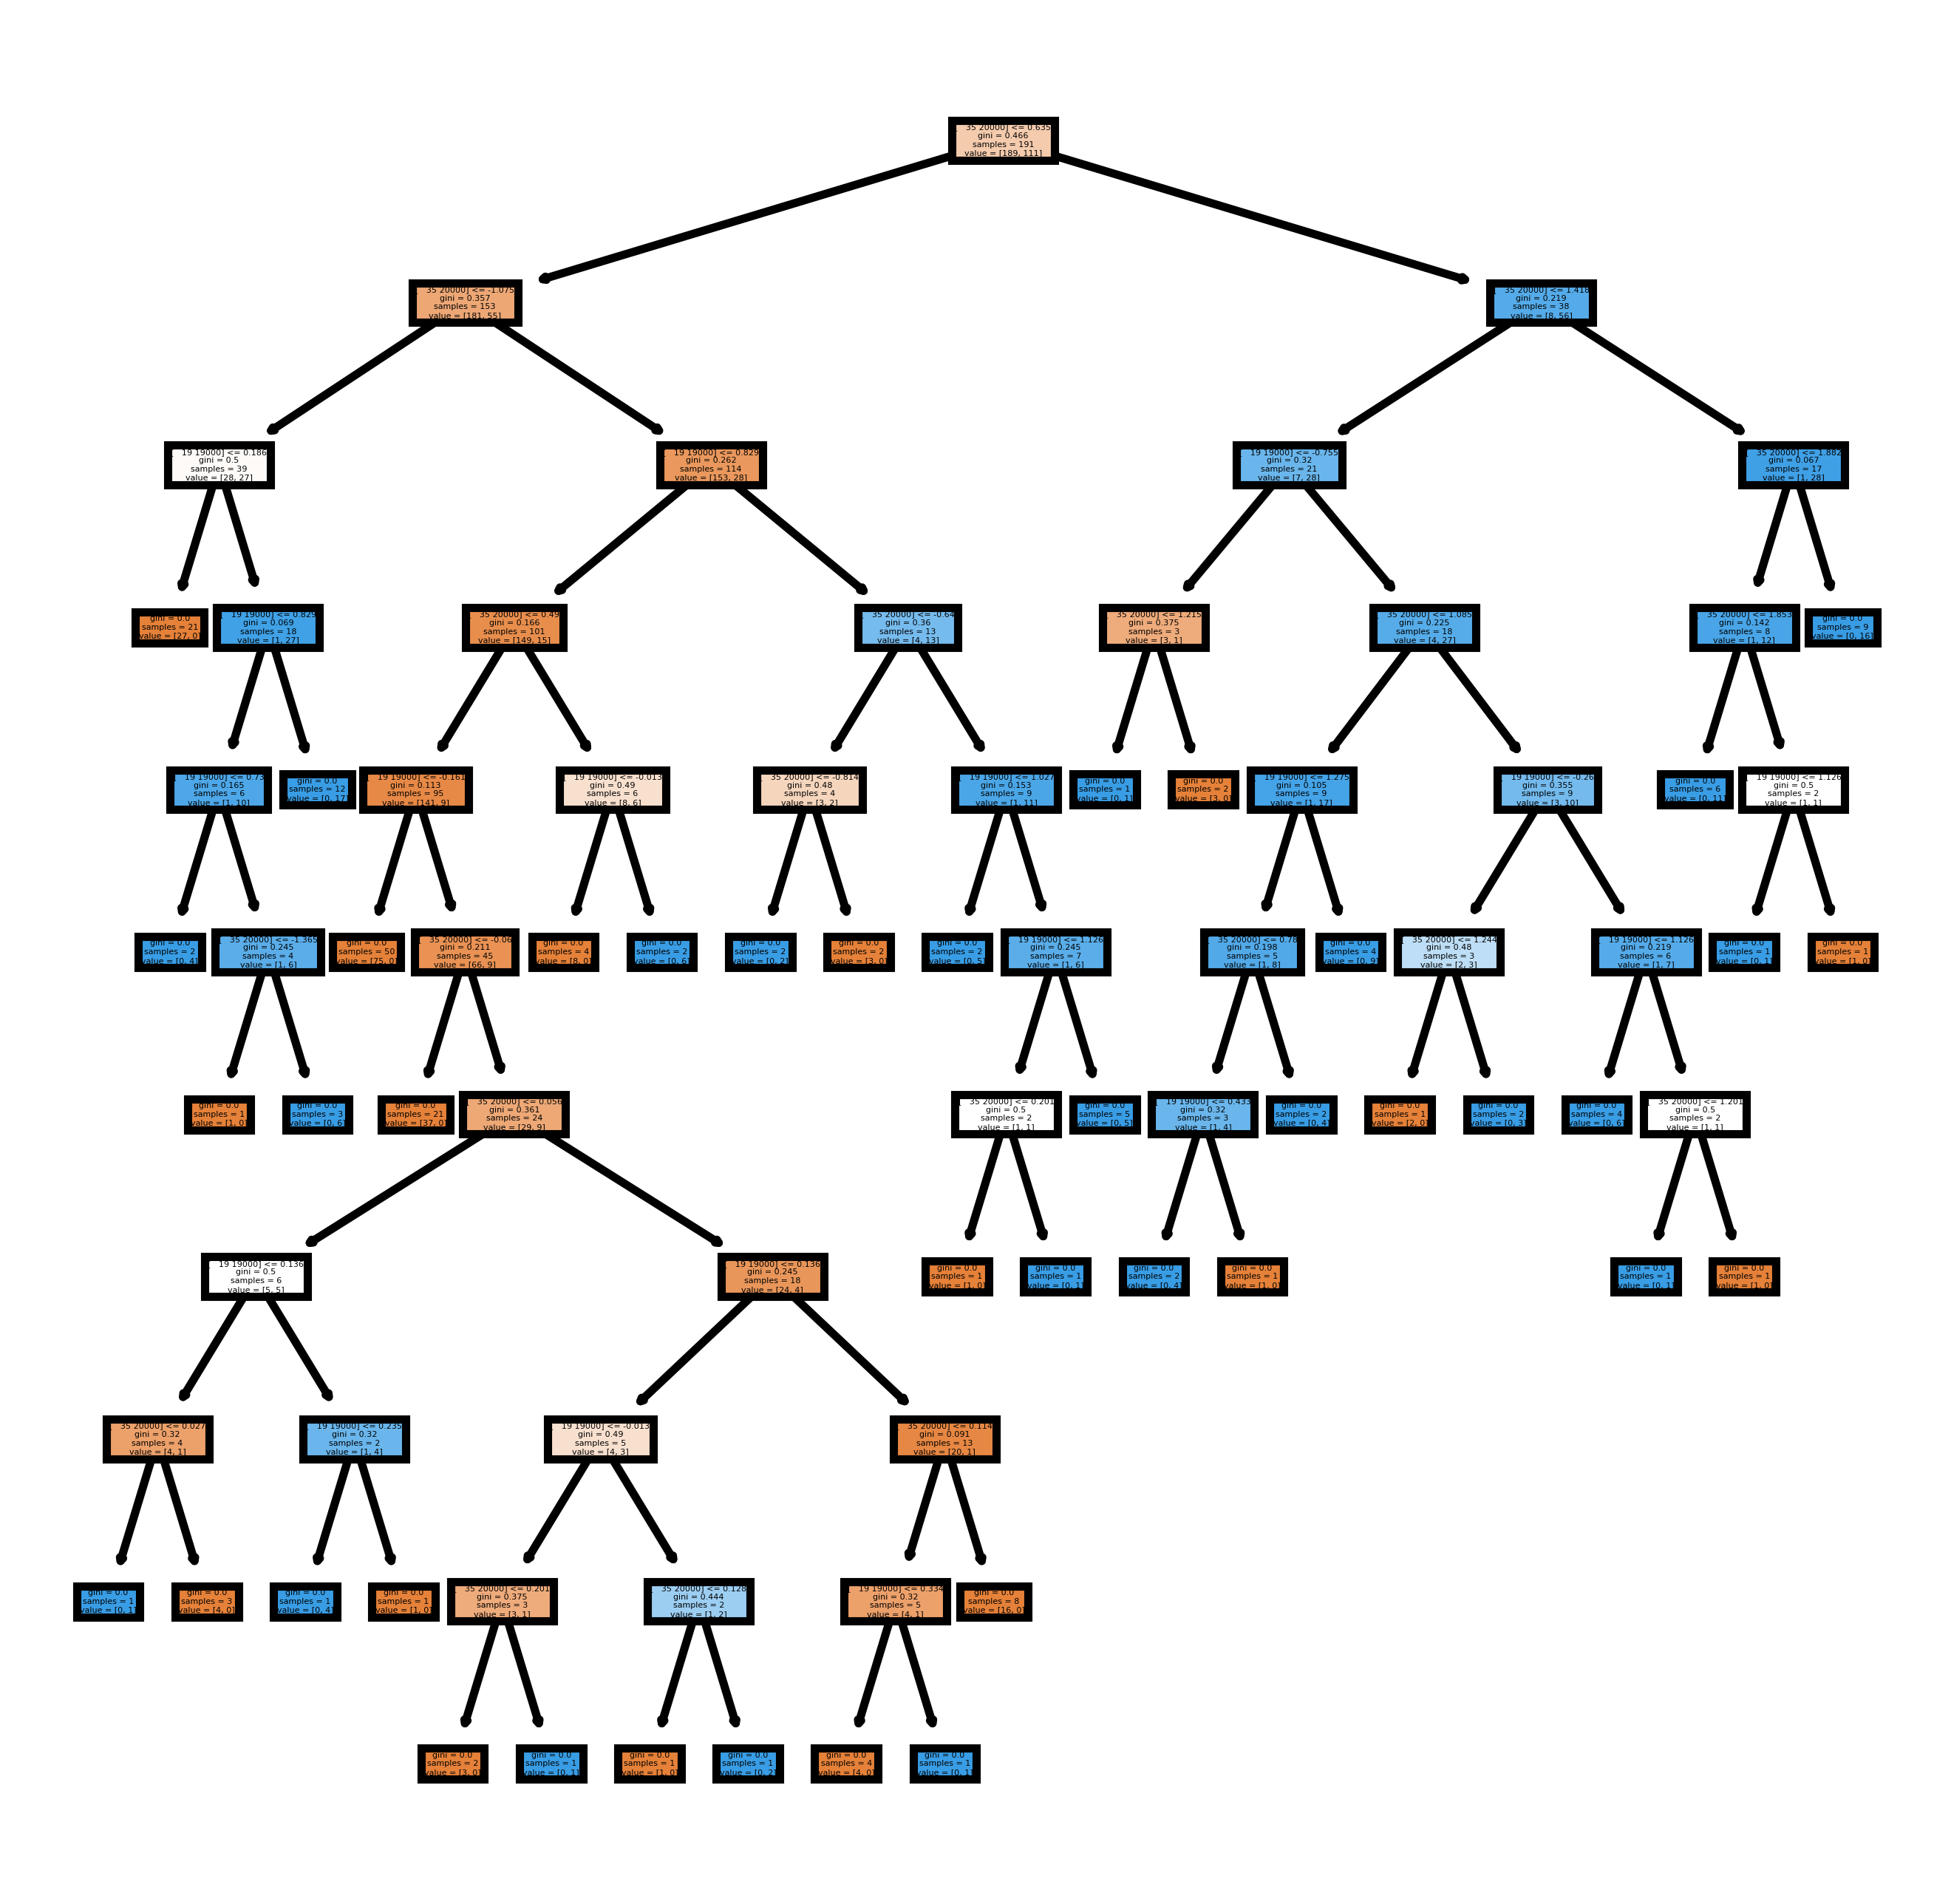

In [40]:
# There is no class here
# They are just purchased (yes/no)i.e (0/1)
# so we did't give class name to tree.plot_tree
fn=x
cn=y
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names=x,
               filled=True)
fig.savefig('rf_individualtree.png')